In [151]:
%matplotlib inline
from __future__ import division, print_function
from matplotlib.pyplot import figure, legend, hist, plot, title
from multiprocessing import cpu_count
from numpy import allclose, exp, float, int, linspace, log, nan, sqrt
from os import system
from os.path import join
from pandas import Categorical, concat, DataFrame, get_dummies, read_table, Series
from random import seed
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

#system('pip install --upgrade git+git://GitHub.com/ChicagoBoothML/Helpy --no-dependencies')
#from ChicagoBoothML_Helpy.EvaluationMetrics import bin_class_dev, bin_classif_eval
#from ChicagoBoothML_Helpy.Print import printflush

RANDOM_SEED = 99
seed(RANDOM_SEED)


In [152]:
data_folder_path = r'C:\Users\Administrator\Desktop\Tuna' #change to your folder path

churn = read_table(
    join(data_folder_path, 'orange_small_train_churn.labels.txt').replace('\\', '/'),
    header=None).iloc[:, 0].astype('category')

# add other labels later

churn.cat.rename_categories(['no', 'yes'], inplace=True)
churn


0         no
1         no
2         no
3         no
4        yes
5         no
6         no
7         no
8        yes
9         no
10        no
11        no
12        no
13        no
14        no
15        no
16        no
17        no
18        no
19        no
20        no
21        no
22        no
23        no
24        no
25        no
26        no
27       yes
28        no
29        no
        ... 
49970    yes
49971     no
49972     no
49973     no
49974     no
49975     no
49976     no
49977     no
49978    yes
49979     no
49980     no
49981     no
49982     no
49983     no
49984     no
49985    yes
49986     no
49987     no
49988    yes
49989     no
49990     no
49991     no
49992     no
49993     no
49994     no
49995     no
49996     no
49997     no
49998     no
49999    yes
Name: 0, Length: 50000, dtype: category
Categories (2, object): [no, yes]

In [153]:
na_strings = [
  '',
  'na', 'n.a', 'n.a.',
  'nan', 'n.a.n', 'n.a.n.',
  'NA', 'N.A', 'N.A.',
  'NaN', 'N.a.N', 'N.a.N.',
  'NAN', 'N.A.N', 'N.A.N.',
  'nil', 'Nil', 'NIL',
  'null', 'Null', 'NULL']

X = read_table(
    join(data_folder_path, 'orange_small_train.data').replace('\\', '/'),
    na_values=na_strings)



x_var_names = X.columns
#cs.loc[:, 'SeriousDlqin2yrs'] = Categorical(cs.SeriousDlqin2yrs)

#nb_samples = len(cs)

#cs
X

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN
5,NaN,NaN,NaN,NaN,NaN,658.0,7.0,NaN,NaN,NaN,...,zCkv,QqVuch3,LM8l689qOp,NaN,NaN,Qcbd,02N6s8f,Zy3gnGM,am7c,NaN
6,NaN,NaN,NaN,NaN,NaN,1680.0,7.0,NaN,NaN,NaN,...,oslk,XlgxB9z,LM8l689qOp,NaN,kG3k,FSa2,RAYp,55YFVY9,am7c,NaN
7,NaN,NaN,NaN,NaN,NaN,77.0,0.0,NaN,NaN,NaN,...,oslk,R2LdzOv,NaN,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,1176.0,7.0,NaN,NaN,NaN,...,zCkv,K2SqEo9,jySVZNlOJy,NaN,kG3k,PM2D,6fzt,am14IcfM7tWLrUmRT52KtA,am7c,NaN
9,NaN,NaN,NaN,NaN,NaN,1141.0,7.0,NaN,NaN,NaN,...,oslk,EPqQcw6,LM8l689qOp,NaN,kG3k,FSa2,RAYp,55YFVY9,NaN,NaN


In [154]:
x_types = {x_var_name: X[x_var_name].dtype for x_var_name in x_var_names}

for x_var_name in x_var_names:
    if x_types[x_var_name] == int:
        x = X[x_var_name].astype(float)
        X.loc[:, x_var_name] = x
        x_types[x_var_name] = x.dtype
    elif x_types[x_var_name] != float:
        x = X[x_var_name].astype('category')
        X.loc[:, x_var_name] = x
        x_types[x_var_name] = x.dtype

x_types

{'Var1': dtype('float64'),
 'Var10': dtype('float64'),
 'Var100': dtype('float64'),
 'Var101': dtype('float64'),
 'Var102': dtype('float64'),
 'Var103': dtype('float64'),
 'Var104': dtype('float64'),
 'Var105': dtype('float64'),
 'Var106': dtype('float64'),
 'Var107': dtype('float64'),
 'Var108': dtype('float64'),
 'Var109': dtype('float64'),
 'Var11': dtype('float64'),
 'Var110': dtype('float64'),
 'Var111': dtype('float64'),
 'Var112': dtype('float64'),
 'Var113': dtype('float64'),
 'Var114': dtype('float64'),
 'Var115': dtype('float64'),
 'Var116': dtype('float64'),
 'Var117': dtype('float64'),
 'Var118': dtype('float64'),
 'Var119': dtype('float64'),
 'Var12': dtype('float64'),
 'Var120': dtype('float64'),
 'Var121': dtype('float64'),
 'Var122': dtype('float64'),
 'Var123': dtype('float64'),
 'Var124': dtype('float64'),
 'Var125': dtype('float64'),
 'Var126': dtype('float64'),
 'Var127': dtype('float64'),
 'Var128': dtype('float64'),
 'Var129': dtype('float64'),
 'Var13': dtype('fl

In [155]:

RANDOM_SEED = 99
test_proportion = .6

split = StratifiedShuffleSplit(
    y=churn,
    n_iter=1,
    test_size=test_proportion,
    random_state=RANDOM_SEED)


for train_valid_indices, test_indices in split:
    X_train_valid, X_test = X.iloc[train_valid_indices, :], X.iloc[test_indices, :]
    churn_train_valid, churn_test = churn.iloc[train_valid_indices], churn.iloc[test_indices]   
    
valid_proportion_of_train_valid = .25
split = StratifiedShuffleSplit(
    y=churn_train_valid,
    n_iter=1,
    test_size=valid_proportion_of_train_valid,
    random_state=RANDOM_SEED)

for train_indices, valid_indices in split:
    X_train, X_valid = X_train_valid.iloc[train_indices, :], X_train_valid.iloc[valid_indices, :]
    churn_train, churn_valid = churn_train_valid.iloc[train_indices], churn_train_valid.iloc[valid_indices] #######
    
churn_data_sets = dict(
    train=churn_train,
    valid=churn_valid,
    test=churn_test)

data_set_summaries = DataFrame(index=['train', 'valid', 'test'])
data_set_summaries['nb_samples'] = nan
data_set_summaries['churn_incidence'] = nan

for churn_data_set_name in churn_data_sets:
    churn_data_set = churn_data_sets[churn_data_set_name]
    nb_samples = len(churn_data_set)
    data_set_summaries.loc[churn_data_set_name, :] =\
        nb_samples, (churn_data_set == 'yes').sum() / nb_samples




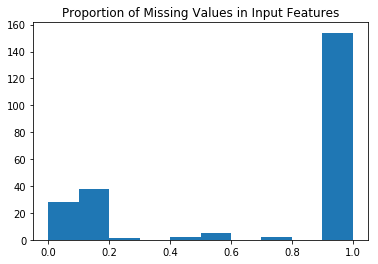

In [156]:

nb_train_samples = data_set_summaries.nb_samples['train']

input_features_missing_proportions = X_train.isnull().sum() / nb_train_samples

hist(input_features_missing_proportions)
title('Proportion of Missing Values in Input Features')


In [157]:
x_var_names = input_features_missing_proportions[input_features_missing_proportions <= .2].index

#x_var_names

Index(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28',
       'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var73', 'Var74', 'Var76',
       'Var78', 'Var81', 'Var83', 'Var85', 'Var109', 'Var112', 'Var113',
       'Var119', 'Var123', 'Var125', 'Var132', 'Var133', 'Var134', 'Var140',
       'Var143', 'Var144', 'Var149', 'Var153', 'Var160', 'Var163', 'Var173',
       'Var181', 'Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var198',
       'Var199', 'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207',
       'Var208', 'Var210', 'Var211', 'Var212', 'Var216', 'Var217', 'Var218',
       'Var219', 'Var220', 'Var221', 'Var222', 'Var223', 'Var226', 'Var227',
       'Var228'],
      dtype='object')

In [158]:
#len(x_var_names)


66

In [159]:
X_train = X_train[x_var_names]

x_types = {x_var_name: X_train[x_var_name].dtype for x_var_name in x_var_names}

#x_types

{'Var109': dtype('float64'),
 'Var112': dtype('float64'),
 'Var113': dtype('float64'),
 'Var119': dtype('float64'),
 'Var123': dtype('float64'),
 'Var125': dtype('float64'),
 'Var13': dtype('float64'),
 'Var132': dtype('float64'),
 'Var133': dtype('float64'),
 'Var134': dtype('float64'),
 'Var140': dtype('float64'),
 'Var143': dtype('float64'),
 'Var144': dtype('float64'),
 'Var149': dtype('float64'),
 'Var153': dtype('float64'),
 'Var160': dtype('float64'),
 'Var163': dtype('float64'),
 'Var173': dtype('float64'),
 'Var181': dtype('float64'),
 'Var192': category,
 'Var193': category,
 'Var195': category,
 'Var196': category,
 'Var197': category,
 'Var198': category,
 'Var199': category,
 'Var202': category,
 'Var203': category,
 'Var204': category,
 'Var205': category,
 'Var206': category,
 'Var207': category,
 'Var208': category,
 'Var21': dtype('float64'),
 'Var210': category,
 'Var211': category,
 'Var212': category,
 'Var216': category,
 'Var217': category,
 'Var218': category,
 '

In [160]:
float_x_var_names = [x_var_name for x_var_name in x_var_names
                     if x_types[x_var_name] == float]

#float_x_var_names

['Var6',
 'Var7',
 'Var13',
 'Var21',
 'Var22',
 'Var24',
 'Var25',
 'Var28',
 'Var35',
 'Var38',
 'Var44',
 'Var57',
 'Var65',
 'Var74',
 'Var76',
 'Var78',
 'Var81',
 'Var83',
 'Var85',
 'Var109',
 'Var112',
 'Var113',
 'Var119',
 'Var123',
 'Var125',
 'Var132',
 'Var133',
 'Var134',
 'Var140',
 'Var143',
 'Var144',
 'Var149',
 'Var153',
 'Var160',
 'Var163',
 'Var173',
 'Var181']

In [15]:
#X_train[float_x_var_names].std()

Var6      2.497070e+03
Var7      6.284170e+00
Var13     3.180341e+03
Var21     5.266174e+02
Var22     6.551923e+02
Var24     9.448410e+00
Var25     2.021789e+02
Var28     1.018158e+02
Var35     3.020369e+00
Var38     2.990099e+06
Var44     1.835519e+00
Var57     2.022862e+00
Var65     1.014950e+01
Var74     1.303626e+03
Var76     1.854919e+06
Var78     2.118260e+00
Var81     1.057649e+05
Var83     9.016589e+01
Var85     1.864863e+01
Var109    1.515722e+02
Var112    1.396701e+02
Var113    7.498642e+05
Var119    2.111373e+03
Var123    2.162100e+02
Var125    9.698485e+04
Var132    1.002466e+01
Var133    2.441404e+06
Var134    6.154300e+05
Var140    3.198346e+03
Var143    5.758865e-01
Var144    1.163373e+01
Var149    6.310587e+05
Var153    4.358615e+06
Var160    9.328006e+01
Var163    8.148342e+05
Var173    1.192286e-01
Var181    2.478367e+00
dtype: float64

In [16]:
#X_train[float_x_var_names].isnull().sum() / nb_train_samples

Var6      0.111867
Var7      0.112333
Var13     0.112333
Var21     0.111867
Var22     0.101733
Var24     0.146067
Var25     0.101733
Var28     0.101733
Var35     0.101733
Var38     0.101733
Var44     0.101733
Var57     0.000000
Var65     0.112333
Var74     0.112333
Var76     0.101733
Var78     0.101733
Var81     0.111867
Var83     0.101733
Var85     0.101733
Var109    0.146067
Var112    0.101733
Var113    0.000000
Var119    0.111867
Var123    0.101733
Var125    0.112333
Var132    0.101733
Var133    0.101733
Var134    0.101733
Var140    0.112333
Var143    0.101733
Var144    0.111867
Var149    0.146067
Var153    0.101733
Var160    0.101733
Var163    0.101733
Var173    0.101733
Var181    0.101733
dtype: float64

In [161]:
float_x_means = X_train.mean()  # needed when standardizing X_test , together with sigma^2
float_x_stds=X_train.std()

#print(X_train.loc['Var6'])
#print(float_x_stds.loc['Var6'])

for float_x_var_name in float_x_var_names:
    x = X_train[float_x_var_name]
    x_valid=X_valid[float_x_var_name]
    x_test=X_test[float_x_var_name]
    missing_value_row_yesno = x.isnull()
    missing_value_row_yesno_valid = x_valid.isnull()
    missing_value_row_yesno_test = x_test.isnull()
    if missing_value_row_yesno.sum() > 0:
        X_train.ix[missing_value_row_yesno.tolist(), float_x_var_name] =float_x_means[float_x_var_name]
    if missing_value_row_yesno_valid.sum() > 0:
        X_valid.ix[missing_value_row_yesno_valid.tolist(), float_x_var_name] =float_x_means[float_x_var_name]
    if missing_value_row_yesno_test.sum() > 0:
        X_test.ix[missing_value_row_yesno_test.tolist(), float_x_var_name] =float_x_means[float_x_var_name]
        
# standardize them on the selected float fields
for float_x_var_name in float_x_var_names:
    X_train.loc[:,float_x_var_name]=(X_train.loc[:,float_x_var_name]-float_x_means[float_x_var_name])/float_x_stds[float_x_var_name]
    X_valid.loc[:,float_x_var_name]=(X_valid.loc[:,float_x_var_name]-float_x_means[float_x_var_name])/float_x_stds[float_x_var_name]
    X_test.loc[:,float_x_var_name]=(X_test.loc[:,float_x_var_name]-float_x_means[float_x_var_name])/float_x_stds[float_x_var_name]



X_train

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\ANACONDA\lib\site-packages\ipykernel_laun

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228
7906,-0.451829,-1.082204,-0.394755,-0.169568,-0.165911,-0.485174,-0.404799,0.060876,-0.239333,0.308174,...,bRgG,UYBR,qxDb,8c8KEbL,z4pH,UQenOT8,LM8l689qOp,7aLG,ZI9m,F2FyR07IdsN7I
7984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,q9Nd,cJvF,FzaX,MKZfql_,oslk,3lfAGfT,LM8l689qOp,wX53,RAYp,F2FyR07IdsN7I
18707,-0.115435,1.145617,2.384821,-0.025251,-0.020915,0.573205,-0.286092,-0.567710,-0.239333,-0.848165,...,JEdI,cJvF,FzaX,Fon8hdx,oslk,bTV7qqc,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I
3309,0.302255,0.031706,-0.052653,0.141854,0.146975,-0.061822,0.149166,1.359692,-0.239333,-0.542745,...,7mZe,cJvF,FzaX,UF16siJ,zCkv,APgdzOv,jySVZNlOJy,7FJQ,6fzt,xwM2aC7IdeMC0
8307,-0.527518,1.145617,0.271840,-0.443011,-0.440639,0.000000,-0.483937,0.089163,-0.239333,-0.848165,...,4a9J,UYBR,FzaX,UF16siJ,zCkv,APgdzOv,jySVZNlOJy,FSa2,6fzt,Zy3gnGM
1561,-0.376140,-1.082204,-0.394755,-0.192355,-0.188805,-0.485174,-0.325661,0.691820,-0.239333,-0.251216,...,2lkY,UYBR,FzaX,fxJ68SY,oslk,SyxQQMs,jySVZNlOJy,Aoh3,RAYp,F2FyR07IdsN7I
5160,-0.496681,-1.082204,-0.394755,-0.374650,-0.371957,-0.273498,-0.325661,-0.370491,-0.239333,-0.848165,...,cCbz,UYBR,FzaX,95r8hdx,oslk,Pk67qqc,LM8l689qOp,xb3V,RAYp,F2FyR07IdsN7I
34916,-0.331288,-1.082204,-0.394755,0.582401,0.589593,0.784881,0.149166,0.614818,-0.239333,1.238803,...,m30S,cJvF,FzaX,FhT87dl,oslk,og8TE6Y,LM8l689qOp,xb3V,RAYp,F2FyR07IdsN7I
45449,-0.042549,0.031706,0.480623,-0.215142,-0.211699,-0.485174,0.188735,0.089163,-0.239333,-0.328048,...,Sujr,UYBR,FzaX,4UxGlow,zCkv,catzS2D,LM8l689qOp,fKCe,ZI9m,ib5G6X1eUxUn6
3286,-0.283632,0.031706,-0.311745,-0.207546,-0.204067,-0.485174,-0.483937,0.286382,-0.239333,1.579046,...,UvVL,cJvF,FzaX,k5O88FJ,oslk,QkgQQMs,LM8l689qOp,453m,RAYp,F2FyR07IdsN7I


In [163]:
X_test

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
13618,NaN,NaN,NaN,NaN,NaN,0.672289,0.031706,NaN,NaN,NaN,...,oslk,e2Oj5v6,LM8l689qOp,NaN,kG3k,WqMG,RAYp,F2FyR07IdsN7I,mj86,NaN
33930,NaN,NaN,NaN,NaN,NaN,-0.415386,0.031706,NaN,NaN,NaN,...,oslk,_rKAGfT,LM8l689qOp,NaN,kG3k,TNEC,RAYp,F2FyR07IdsN7I,am7c,NaN
21690,NaN,NaN,NaN,NaN,NaN,0.450829,-1.082204,NaN,NaN,NaN,...,oslk,XByOEra,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
46540,NaN,NaN,NaN,NaN,NaN,-0.303255,-1.082204,NaN,NaN,NaN,...,oslk,DQ3u3MC,LM8l689qOp,NaN,NaN,Qu4f,RAYp,F2FyR07IdsN7I,NaN,NaN
28853,NaN,NaN,NaN,NaN,NaN,0.876928,0.031706,NaN,NaN,NaN,...,oslk,xMusxs4,LM8l689qOp,NaN,xG3x,Xa3G,RAYp,F2FyR07IdsN7I,mj86,NaN
38484,NaN,NaN,NaN,NaN,NaN,-0.017320,1.145617,NaN,NaN,NaN,...,d0EEeJi,dnMUr1Y,LM8l689qOp,NaN,NaN,fKCe,nIGXDli,F2FyR07IdsN7I,NaN,NaN
1984,NaN,NaN,NaN,NaN,133810.0,0.000000,0.000000,NaN,NaN,662355.0,...,d0EEeJi,4K2GgwO,LM8l689qOp,NaN,NaN,FSa2,02N6s8f,F2FyR07IdsN7I,NaN,NaN
1728,NaN,0.0,234.0,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,...,oslk,nx1K0JH,LM8l689qOp,4n2X,NaN,Xa3G,RAYp,F2FyR07IdsN7I,NaN,NaN
18156,8.0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,28.0,NaN,...,oslk,MI8s5nE,LM8l689qOp,NaN,NaN,7P5s,RAYp,F2FyR07IdsN7I,NaN,NaN
28230,NaN,NaN,NaN,NaN,NaN,-0.154681,0.000000,NaN,NaN,NaN,...,oslk,N8wTzYj,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,am7c,NaN


In [17]:
#allclose(X_train.mean(), float_x_means)

True

In [164]:
categorical_x_var_names = [x_var_name for x_var_name in x_var_names
                           if x_types[x_var_name] != float]

nb_train_samples = data_set_summaries.nb_samples['train']


#tmp=X_train[categorical_x_var_names].iloc[0:1,:]
#X_combine=concat([X_train,X_valid,X_test]) # combine 
#data_dummy=get_dummies(X_combine)
#X_train= data_dummy[:nb_train_samples]
#X_train= dataset_dummy[nb_train_samples:nb_valid_samples]
#X_test = dataset_dummy[nb_valid_samples:]

categorical_x_nb_levels = X_train[categorical_x_var_names].apply(lambda col: len(col.cat.categories))

categorical_x_nb_levels
#X_valid
#tmp.apply(lambda col: len(col.cat.categories))

#print('************'+str(len(set(X_train['Var196']))))
#tmp.apply(lambda col: len(col.cat.categories))

Var73       131
Var192      361
Var193       51
Var195       23
Var196        4
Var197      225
Var198     4291
Var199     5073
Var202     5713
Var203        5
Var204      100
Var205        3
Var206       21
Var207       14
Var208        2
Var210        6
Var211        2
Var212       81
Var216     2016
Var217    13990
Var218        2
Var219       22
Var220     4291
Var221        7
Var222     4291
Var223        4
Var226       23
Var227        7
Var228       30
dtype: int64

In [165]:
categorical_x_var_names = categorical_x_nb_levels[categorical_x_nb_levels <= 500].index

categorical_x_var_names

Index(['Var73', 'Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var203',
       'Var204', 'Var205', 'Var206', 'Var207', 'Var208', 'Var210', 'Var211',
       'Var212', 'Var218', 'Var219', 'Var221', 'Var223', 'Var226', 'Var227',
       'Var228'],
      dtype='object')

In [166]:
collapsed_categories = {}
removed_categorical_x_var_names = set()

for categorical_x_var_name in categorical_x_var_names:
  
    missing_value_row_yesno = X_train[categorical_x_var_name].isnull()
    missing_value_row_yesno_valid = X_valid[categorical_x_var_name].isnull() # for valid
    missing_value_row_yesno_test=X_test[categorical_x_var_name].isnull() #for test dataset
    
    if missing_value_row_yesno.sum() > 0:
        X_train[categorical_x_var_name].cat.add_categories('zzzMISSING', inplace=True)
        X_valid[categorical_x_var_name].cat.add_categories('zzzMISSING', inplace=True)
        X_test[categorical_x_var_name].cat.add_categories('zzzMISSING', inplace=True)
        
        X_train.ix[missing_value_row_yesno.tolist(), categorical_x_var_name] = 'zzzMISSING'
        X_valid.ix[missing_value_row_yesno_valid.tolist(), categorical_x_var_name] = 'zzzMISSING'
        X_test.ix[missing_value_row_yesno_test.tolist(), categorical_x_var_name] = 'zzzMISSING'
    
    
    x = X_train[categorical_x_var_name].copy()
    x_valid=X_valid[categorical_x_var_name].copy()
    x_test=X_test[categorical_x_var_name].copy()
    for category in x.cat.categories:
        matching_rows_yesno = x == category
        matching_rows_yesno_valid = x_valid == category #for valid
        matching_rows_yesno_test= x_test==category # for test dataset
        if matching_rows_yesno.sum() < .05 * nb_train_samples:
            if categorical_x_var_name in collapsed_categories:
                collapsed_categories[categorical_x_var_name].append(category) 
            else:
                collapsed_categories[categorical_x_var_name] = [category]
            if 'zzzOTHER' not in X_train[categorical_x_var_name].cat.categories:
                X_train[categorical_x_var_name].cat.add_categories('zzzOTHER', inplace=True)
            if 'zzzOTHER' not in X_valid[categorical_x_var_name].cat.categories:
                X_valid[categorical_x_var_name].cat.add_categories('zzzOTHER', inplace=True)
            if 'zzzOTHER' not in X_test[categorical_x_var_name].cat.categories:
                X_test[categorical_x_var_name].cat.add_categories('zzzOTHER', inplace=True)
                
            X_train.ix[matching_rows_yesno, categorical_x_var_name] = 'zzzOTHER'
            X_valid.ix[matching_rows_yesno_valid, categorical_x_var_name] = 'zzzOTHER' #valid
            X_test.ix[matching_rows_yesno_test, categorical_x_var_name] = 'zzzOTHER' # test dataset
            X_train[categorical_x_var_name].cat.remove_categories(category, inplace=True)
            X_valid[categorical_x_var_name].cat.remove_categories(category, inplace=True)
            X_test[categorical_x_var_name].cat.remove_categories(category, inplace=True)
  
    categories = X_train[categorical_x_var_name].cat.categories
    if (len(categories) == 1) or\
        (len(set(categories) - set(['zzzMISSING', 'zzzOTHER'])) < 2):
        removed_categorical_x_var_names.add(categorical_x_var_name)

categorical_x_var_names = list(set(categorical_x_var_names) - removed_categorical_x_var_names)

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [169]:
#for categorical_x_var_name in categorical_x_var_names:
#    x = X_train[categorical_x_var_name]   
    #print(sum(X_train[categorical_x_var_name].isnull()))
    
X_test

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
13618,NaN,NaN,NaN,NaN,NaN,0.672289,0.031706,NaN,NaN,NaN,...,oslk,e2Oj5v6,LM8l689qOp,NaN,kG3k,WqMG,RAYp,F2FyR07IdsN7I,mj86,NaN
33930,NaN,NaN,NaN,NaN,NaN,-0.415386,0.031706,NaN,NaN,NaN,...,oslk,_rKAGfT,LM8l689qOp,NaN,kG3k,zzzOTHER,RAYp,F2FyR07IdsN7I,am7c,NaN
21690,NaN,NaN,NaN,NaN,NaN,0.450829,-1.082204,NaN,NaN,NaN,...,oslk,XByOEra,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
46540,NaN,NaN,NaN,NaN,NaN,-0.303255,-1.082204,NaN,NaN,NaN,...,oslk,DQ3u3MC,LM8l689qOp,NaN,NaN,Qu4f,RAYp,F2FyR07IdsN7I,NaN,NaN
28853,NaN,NaN,NaN,NaN,NaN,0.876928,0.031706,NaN,NaN,NaN,...,oslk,xMusxs4,LM8l689qOp,NaN,xG3x,zzzOTHER,RAYp,F2FyR07IdsN7I,mj86,NaN
38484,NaN,NaN,NaN,NaN,NaN,-0.017320,1.145617,NaN,NaN,NaN,...,d0EEeJi,dnMUr1Y,LM8l689qOp,NaN,NaN,fKCe,zzzOTHER,F2FyR07IdsN7I,NaN,NaN
1984,NaN,NaN,NaN,NaN,133810.0,0.000000,0.000000,NaN,NaN,662355.0,...,d0EEeJi,4K2GgwO,LM8l689qOp,NaN,NaN,FSa2,zzzOTHER,F2FyR07IdsN7I,NaN,NaN
1728,NaN,0.0,234.0,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,...,oslk,nx1K0JH,LM8l689qOp,4n2X,NaN,zzzOTHER,RAYp,F2FyR07IdsN7I,NaN,NaN
18156,8.0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,28.0,NaN,...,oslk,MI8s5nE,LM8l689qOp,NaN,NaN,7P5s,RAYp,F2FyR07IdsN7I,NaN,NaN
28230,NaN,NaN,NaN,NaN,NaN,-0.154681,0.000000,NaN,NaN,NaN,...,oslk,N8wTzYj,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,am7c,NaN


In [170]:
x_var_names = list(float_x_var_names) + list(categorical_x_var_names)

X_train = X_train[x_var_names]

X_valid=X_valid[x_var_names] #valid dataset

X_test=X_test[x_var_names] # test dataset

nb_x_vars = len(x_var_names)

nb_x_vars


52

In [173]:
"""
def prepare_X_OOS(X_OOS,
                  float_x_var_names=float_x_var_names,
                  categorical_x_var_names=categorical_x_var_names):
    
    X_OOS = X_OOS[list(float_x_var_names) + list(categorical_x_var_names)]

    for float_x_var_name in float_x_var_names:
        x = X_OOS[float_x_var_name]
        missing_value_row_yesno = x.isnull()
        if missing_value_row_yesno.sum() > 0:
            X_OOS.ix[missing_value_row_yesno.tolist(), float_x_var_name] =\
                float_x_means[float_x_var_name]

    for categorical_x_var_name in categorical_x_var_names:

        missing_value_row_yesno = X_OOS[categorical_x_var_name].isnull()
        if missing_value_row_yesno.sum() > 0:
            X_OOS[categorical_x_var_name].cat.add_categories('zzzMISSING', inplace=True)
            X_OOS.ix[missing_value_row_yesno.tolist(), categorical_x_var_name] = 'zzzMISSING'

        if categorical_x_var_name in collapsed_categories:
            X_OOS[categorical_x_var_name].cat.add_categories('zzzOTHER', inplace=True)
            x = X_OOS[categorical_x_var_name].copy()
            for category in collapsed_categories[categorical_x_var_name]:
                matching_rows_yesno = x == category
                X_OOS.ix[matching_rows_yesno, categorical_x_var_name] = 'zzzOTHER'
                X_OOS[categorical_x_var_name].cat.remove_categories(category, inplace=True)
    
    return X_OOS

X_valid = prepare_X_OOS(X_valid)
    
"""
        

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var211,Var193,Var208,Var227,Var223,Var226,Var206,Var221,Var203,Var197
7906,-0.451829,-1.082204,-0.394755,-0.169568,-0.165911,-0.485174,-0.404799,0.060876,-0.239333,0.308174,...,Mtgm,RO12,kIsH,ZI9m,LM8l689qOp,zzzOTHER,IYzP,zzzOTHER,9_Y1,zzzOTHER
7984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,L84s,RO12,kIsH,RAYp,LM8l689qOp,zzzOTHER,zzzMISSING,oslk,9_Y1,zzzOTHER
18707,-0.115435,1.145617,2.384821,-0.025251,-0.020915,0.573205,-0.286092,-0.567710,-0.239333,-0.848165,...,L84s,RO12,kIsH,RAYp,LM8l689qOp,fKCe,IYzP,oslk,9_Y1,zzzOTHER
3309,0.302255,0.031706,-0.052653,0.141854,0.146975,-0.061822,0.149166,1.359692,-0.239333,-0.542745,...,L84s,zzzOTHER,kIsH,6fzt,jySVZNlOJy,zzzOTHER,zzzOTHER,zCkv,9_Y1,lK27
8307,-0.527518,1.145617,0.271840,-0.443011,-0.440639,0.000000,-0.483937,0.089163,-0.239333,-0.848165,...,L84s,2Knk1KF,kIsH,6fzt,jySVZNlOJy,FSa2,zzzOTHER,zCkv,9_Y1,JLbT
1561,-0.376140,-1.082204,-0.394755,-0.192355,-0.188805,-0.485174,-0.325661,0.691820,-0.239333,-0.251216,...,Mtgm,RO12,kIsH,RAYp,jySVZNlOJy,zzzOTHER,zm5i,oslk,9_Y1,lK27
5160,-0.496681,-1.082204,-0.394755,-0.374650,-0.371957,-0.273498,-0.325661,-0.370491,-0.239333,-0.848165,...,L84s,RO12,kIsH,RAYp,LM8l689qOp,zzzOTHER,zm5i,oslk,9_Y1,zzzOTHER
34916,-0.331288,-1.082204,-0.394755,0.582401,0.589593,0.784881,0.149166,0.614818,-0.239333,1.238803,...,L84s,RO12,kIsH,RAYp,LM8l689qOp,zzzOTHER,IYzP,oslk,9_Y1,zzzOTHER
45449,-0.042549,0.031706,0.480623,-0.215142,-0.211699,-0.485174,0.188735,0.089163,-0.239333,-0.328048,...,L84s,zzzOTHER,kIsH,ZI9m,LM8l689qOp,fKCe,zzzOTHER,zCkv,9_Y1,zzzOTHER
3286,-0.283632,0.031706,-0.311745,-0.207546,-0.204067,-0.485174,-0.483937,0.286382,-0.239333,1.579046,...,Mtgm,RO12,kIsH,RAYp,LM8l689qOp,zzzOTHER,IYzP,oslk,9_Y1,zzzOTHER


In [245]:

#*****************start PCA part
"""
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_train=X_train.as_matrix()
X_train = StandardScaler().fit_transform(X_train)

pca = PCA(n_components=30)
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_  # importance percentage of each component
transform_matrix=np.transpose(pca.components_) # applied to test data-> X_test x  M

X_train_new=X_dummy.iloc[index_list[:nb_train_samples]]
X_train_new=X_dummy.iloc[index_list[nb_train_samples:nb_valid_samples]]
X_test_new=X_dummy.iloc[index_list[nb_valid_samples:]]
X_test_new
#*************************
"""  
nb_train_samples = data_set_summaries.nb_samples['train']
nb_valid_samples = data_set_summaries.nb_samples['valid']
#nb_test_samples = data_set_summaries.nb_samples['test']
X_combine=concat([X_train,X_valid,X_test])

X_dummy=get_dummies(X_combine)

X_train_new=X_dummy[:int(nb_train_samples)]
X_valid_new=X_dummy[int(nb_train_samples):int(nb_train_samples+nb_valid_samples)]
X_test_new=X_dummy[int(nb_valid_samples+nb_train_samples):]

import numpy as np
from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

X_train_new=X_train_new.as_matrix()
X_valid_new=X_valid_new.as_matrix()
X_test_new=X_test_new.as_matrix()

# pca part
pca = PCA(n_components=32)
X_train_new = pca.fit_transform(X_train_new)  # training input array
pca.explained_variance_ratio_  # importance percentage of each component
trans_mat=np.transpose(pca.components_) # applied to test data-> X_test x  M
print(pca.explained_variance_ratio_.sum())

#####################################################
X_valid_new=np.dot(X_valid_new,trans_mat) # validation input
X_test_new=np.dot(X_test_new,trans_mat)  # test input   after pca transforming
X_test_new.shape
    
# X_new=np.concatenate((X_train_new,X_valid_new))
# Y_new=concat([churn_train,churn_valid])     if using cross-validation


0.884915101901


(30000, 32)

In [242]:

B = 2400
boost_model = GradientBoostingClassifier(
    n_estimators=B,
    loss='deviance',   # a.k.a Cross Entropy in Classification
    learning_rate=.01,   # shrinkage parameter
    subsample=1.,
    min_samples_split=200,
    min_samples_leaf=100,
    min_weight_fraction_leaf=0.0,
    max_depth=10,   # maximum tree depth / number of levels of interaction
    init=None,
    random_state=RANDOM_SEED,
    max_features=None,   # number of features to consider when looking for the best split; None: max_features=n_features
    verbose=1,
    max_leaf_nodes=None,   # None: unlimited number of leaf nodes
    warm_start=False)

boost_model.fit(X=X_train_new, y=churn_train)
print("training is finished")
score=boost_model.score(X=X_valid_new, y=churn_valid)
score


      Iter       Train Loss   Remaining Time 
         1           0.5245           16.76m
         2           0.5239           16.17m
         3           0.5232           14.18m
         4           0.5227           13.13m
         5           0.5221           12.91m
         6           0.5216           13.09m
         7           0.5211           12.68m
         8           0.5206           12.08m
         9           0.5202           11.81m
        10           0.5197           11.62m
        20           0.5136           10.79m
        30           0.5075           10.50m
        40           0.5020           10.21m
        50           0.4966           10.05m
        60           0.4923            9.99m
        70           0.4887           10.05m
        80           0.4858            9.88m
        90           0.4825            9.75m
       100           0.4794            9.67m
       200           0.4481            9.02m
       300           0.4212            8.49m
       40

0.9264

In [246]:
score1=boost_model.score(X=X_test_new, y=churn_test)
score1

0.92656666666666665

In [250]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

X_new=np.concatenate((X_train_new,X_valid_new))
Y_new=concat([churn_train,churn_valid])
clfDT = tree.DecisionTreeClassifier(max_depth=7)
scores = cross_val_score(clfDT, X_new, Y_new, cv=100, n_jobs=-1, verbose=1, scoring='accuracy')
f1_scores = cross_val_score(clfDT, X_new, Y_new, cv=100, n_jobs=-1, verbose=1, scoring='f1_weighted')
DTf1_score=np.mean(f1_scores)
DTaccuracy=np.mean(scores)
print("The accuracy of Decision Tree is:",DTaccuracy)
print("The f1_score of Decision Tree is:",DTf1_score)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.1s


The accuracy of Decision Tree is: 0.925406613915
The f1_score of Decision Tree is: 0.890826496996


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   45.5s finished
